# I. Smart Charging Suggestion:

## Steps of development followed:

1. **Data Collection and Preprocessing:**
   - Gather data on EV usage, including charging patterns, historical charging times, and relevant contextual data (e.g., time of day, day of the week, weather conditions).
   - Preprocess the data to handle missing values, normalize numerical features, and encode categorical variables.

2. **Define the Problem:**
   - Clearly define the problem you want your deep learning model to solve. In this case, it's a regression problem where the model predicts the optimal charging time.

3. **Feature Engineering:**
   - Extract relevant features from the data that can help the model make accurate predictions. For example, you might create features such as time of day, day of the week, historical charging patterns, and external factors like weather conditions.

4. **Split the Data:**
   - Split your dataset into training, validation, and test sets. This helps in evaluating the model's performance on unseen data.

5. **Model Selection:**
   - Choose a deep learning architecture suitable for regression tasks. Recurrent Neural Networks (RNNs) or Long Short-Term Memory networks (LSTMs) can be useful for time-series data. Alternatively, you can use a feedforward neural network with appropriate layers.

6. **Model Training:**
   - Train your chosen model using the training data. Adjust hyperparameters based on the performance on the validation set to prevent overfitting.

7. **Evaluation:**
   - Evaluate the model's performance on the test set. Metrics such as Mean Squared Error (MSE) or Root Mean Squared Error (RMSE) can be used to measure the model's accuracy.

8. **Integration with the EV System:**
   - Once the model is trained and validated, integrate it into the EV charging system. The system should be able to take real-time input data, process it through the model, and provide optimal charging time suggestions.

9. **User Interface:**
   - Develop a user interface to display the suggested charging time to the EV owner. Consider providing additional information or visualizations that help the user understand the reasoning behind the suggestion.

10. **Continuous Improvement:**
   - Monitor the system's performance and gather additional data to continuously improve the model. Regularly update the model with new data to adapt to changing patterns.

Remember to consider factors like electricity rates, user preferences, and any constraints related to charging infrastructure while developing the charging suggestion system. Also, ensure that the system complies with safety and security standards.

### Data Collection and Preprocessing:

1. **Running Hours:**
   - **Type of Data:** Time-series data indicating when the EV is in operation.
   - **Collection Method:** Use GPS or vehicle tracking systems to record the timestamps when the EV is in motion.
   - **Format:** Timestamped records of start and stop times for each running session.

2. **Parking Locations:**
   - **Type of Data:** Spatial data indicating the consistent parking locations of the EV.
   - **Collection Method:** GPS or geolocation data logging when the EV is parked.
   - **Format:** Latitude and longitude coordinates associated with each parking event.

3. **Availability of Charging Infrastructure:**
   - **Type of Data:** Binary or categorical data indicating the presence or absence of charging infrastructure.
   - **Collection Method:** Create a database of charging station locations and their availability status.
   - **Format:** Location data paired with a binary indicator (1 for available, 0 for unavailable).

4. **Day Plans:**
   - **Type of Data:** Categorical data representing user-planned activities for the day.
   - **Collection Method:** User input through a mobile app or web interface where users can provide their schedules.
   - **Format:** Categorical labels indicating planned activities for different times of the day.

5. **Performance Data:**
   - **Type of Data:** Metrics related to EV performance, such as battery health and energy efficiency.
   - **Collection Method:** Onboard diagnostics or telemetry data from the EV.
   - **Format:** Numerical metrics, possibly time-stamped, indicating performance characteristics.

6. **Weather Conditions:**
   - **Type of Data:** Meteorological data including temperature, precipitation, etc.
   - **Collection Method:** Access weather APIs or use weather sensors.
   - **Format:** Time-stamped records of relevant weather parameters.

7. **Traffic and Road Conditions:**
   - **Type of Data:** Real-time or historical data on traffic density and road conditions.
   - **Collection Method:** Use traffic APIs, navigation systems, or integrate with traffic databases.
   - **Format:** Time-stamped records of traffic conditions and road status.

**Data Storage Format:**
- Consider storing the collected data in a structured database (e.g., SQL database) or a time-series database, depending on the data types and volume.
- CSV or JSON formats can be used for exporting and importing datasets.

**Data Privacy Considerations:**
- Ensure compliance with data protection regulations.
- Anonymize or aggregate personally identifiable information (PII) where necessary.

### Problelm Scoping:

**Problem Statement for Smart Charging Suggestion System for Electric Vehicles:**

The objective of this engineering project is to design and implement a robust Smart Charging Suggestion System (SCSS) for Electric Vehicles (EVs). The primary challenge addressed by this project is the optimization of EV charging schedules based on a multitude of dynamic factors. The system aims to intelligently recommend optimal time slots for EV charging, considering the diverse interplay of temporal, spatial, environmental, and user-specific variables.

**Project Scope:**

The SCSS aims to provide a comprehensive and adaptable solution that considers the aforementioned challenges. The developed system will leverage deep learning models, suitable for time-series analysis and regression tasks, to generate context-aware charging time suggestions. The scope also includes the integration of the SCSS into existing EV infrastructure, ensuring seamless interaction and user-friendly recommendations.

**Success Criteria:**

The success of the project will be evaluated based on the system's ability to consistently deliver accurate and personalized charging time suggestions, taking into account the dynamic nature of EV usage and external environmental factors. Performance metrics, including Mean Squared Error (MSE) and user satisfaction surveys, will be utilized to measure the effectiveness and user acceptance of the implemented SCSS.

### Features Engineering:

1. **Running Hours:**
   - Feature Representation: A time-series representation indicating the specific timeslots during which the EV is regularly in operation.
   - Purpose: Captures the temporal patterns of EV usage, helping the model understand the preferred time intervals for travel.

2. **Parking Locations:**
   - Feature Representation: A spatial representation denoting the consistent locations where the EV is parked.
   - Purpose: Allows the model to identify common parking spots, potentially influencing charging time recommendations based on proximity to charging infrastructure.

3. **Availability of Charging Infrastructure:**
   - Feature Representation: Binary or categorical data indicating the presence or absence of charging infrastructure at specific locations.
   - Purpose: Guides the model in recommending charging times based on the accessibility and availability of charging stations near the frequent parking locations.

4. **Day Plans:**
   - Feature Representation: Categorical data representing user-provided plans for the day (e.g., work hours, appointments).
   - Purpose: Incorporates user intentions into the model, influencing the suggested charging times to align with the user's daily schedule and planned activities.

5. **Performance Data:**
   - Feature Representation: Metrics related to the EV's performance, such as battery health, energy efficiency, or historical charging behavior.
   - Purpose: Provides insights into the EV's condition, assisting the model in tailoring charging suggestions based on the vehicle's overall performance characteristics.

6. **Weather Conditions:**
   - Feature Representation: Meteorological data including temperature, precipitation, and other relevant weather parameters.
   - Purpose: Enables the model to consider weather-related factors affecting the EV's energy consumption and charging needs, optimizing suggestions for different weather conditions.

7. **Traffic and Road Conditions:**
   - Feature Representation: Real-time or historical data on traffic density, road congestion, and condition of roads.
   - Purpose: Incorporates external factors affecting travel times, allowing the model to adapt charging suggestions based on expected delays or variations in travel conditions.

### Model Selection:

### Model Training:

#### Installing Packages:

In [18]:
!pip install pandas;
!pip install plotly

^C


#### Importing necessary libraries:

In [20]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import plotly.express as px
import joblib

#### Loading dataset and setting target variable:

In [21]:
# Load your dataset (replace 'your_data.csv' with the actual filename)
data = pd.read_csv('../data/training_dataset/data.csv')

# Target variable
target = 'ChargingStartTime'  # You can choose 'ChargingEndTime' if needed

#### Features for the regression model:

In [22]:
# Features for the regression model
features = ['ParkingLocations', 'ChargingInfrastructure', 'ParkingStartTime', 'ParkingEndTime',
            'BatteryPercentage', 'DistanceFromHome', 'TrafficConditions', 'VehiclePerformance',
            'ChargingTimeRequired']



#### Extract features and target variable:

In [23]:
# Extract features and target variable
X = data[features].copy()  # Create a copy of the DataFrame
y = pd.to_datetime(data[target], format='%I:%M %p').dt.hour * 60 + pd.to_datetime(data[target], format='%I:%M %p').dt.minute


#### Init and Preprocessing:

In [24]:

# Convert time columns to numerical values using apply
X[['ParkingStartTime', 'ParkingEndTime']] = X[['ParkingStartTime', 'ParkingEndTime']].apply(lambda col: pd.to_datetime(col, format='%I:%M %p').dt.hour * 60 + pd.to_datetime(col, format='%I:%M %p').dt.minute)

# Define a preprocessor using ColumnTransformer and Pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', ['ParkingStartTime', 'ParkingEndTime', 'BatteryPercentage', 'DistanceFromHome']),
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['ParkingLocations', 'TrafficConditions', 'VehiclePerformance'])
    ])

# Create a pipeline with preprocessor and Random Forest Regressor model
charging_time_model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

#### Random Forest Regression Model training:

In [25]:
# Train the model on the entire dataset
charging_time_model.fit(X, y)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', 'passthrough',
                                                  ['ParkingStartTime',
                                                   'ParkingEndTime',
                                                   'BatteryPercentage',
                                                   'DistanceFromHome']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['ParkingLocations',
                                                   'TrafficConditions',
                                                   'VehiclePerformance'])])),
                ('regressor', RandomForestRegressor(random_state=42))])

#### Saving the trained model:

In [26]:
# Save the trained model to a file
joblib.dump(charging_time_model, 'charging_time_model.joblib')


['charging_time_model.joblib']

#### Evaluation:

In [27]:
# Load the pre-trained model from the file
charging_time_model = joblib.load('charging_time_model.joblib')

# Load the data for which you want to predict charging slots
new_data = pd.read_csv('../data/testing_dataset/data.csv')  # Replace 'new_data.csv' with your actual file name

# Assuming your CSV file has similar columns as used during training
features = ['ParkingLocations', 'ChargingInfrastructure', 'ParkingStartTime', 'ParkingEndTime',
            'BatteryPercentage', 'DistanceFromHome', 'TrafficConditions', 'VehiclePerformance',
            'ChargingTimeRequired']

# Convert time columns to numerical values using apply
new_data[['ParkingStartTime', 'ParkingEndTime']] = new_data[['ParkingStartTime', 'ParkingEndTime']].apply(
    lambda col: pd.to_datetime(col, format='%I:%M %p').dt.hour * 60 + pd.to_datetime(col, format='%I:%M %p').dt.minute)

# Make predictions on the new data
charging_time_predictions = charging_time_model.predict(new_data[features])

# Calculate end time based on required charging time and battery percentage
required_charging_time = new_data['ChargingTimeRequired']  # replace 'ChargingTimeRequired' with the actual column name
battery_percentage = new_data['BatteryPercentage']  # replace 'BatteryPercentage' with the actual column name
charging_end_times = charging_time_predictions + required_charging_time + (100 - battery_percentage) * 0.1  # Assuming 0.1 minutes for each percentage point

# Format both the predicted start time and end time directly to 12-hour format
charging_time_predictions_12hr = pd.to_datetime(charging_time_predictions, unit='m').strftime('%I:%M %p')
charging_end_times_12hr = pd.to_datetime(charging_end_times, unit='m').dt.strftime('%I:%M %p')

# Create pairs of start and stop times for each predicted time slot
charging_time_slots = list(zip(charging_time_predictions_12hr, charging_end_times_12hr))

# Print or use charging_time_slots as needed
print("Predicted Charging Time Slots (Start, Stop) in 12-hour format:")
print(charging_time_slots)


Predicted Charging Time Slots (Start, Stop) in 12-hour format:
[('12:39 PM', '01:41 PM'), ('04:32 PM', '06:06 PM'), ('07:31 PM', '08:19 PM'), ('07:54 PM', '08:56 PM')]


#### Visualization:

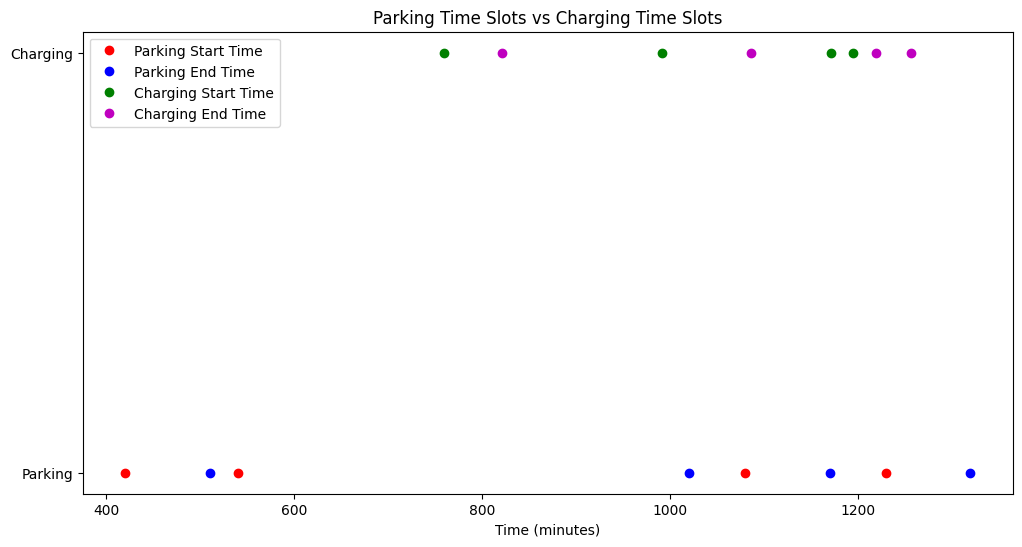

In [28]:
# Plotting the data
plt.figure(figsize=(12, 6))

# Plot parking time slots
plt.plot(new_data['ParkingStartTime'], [1] * len(new_data), 'ro', label='Parking Start Time')
plt.plot(new_data['ParkingEndTime'], [1] * len(new_data), 'bo', label='Parking End Time')

# Plot charging time slots
plt.plot(charging_time_predictions, [2] * len(new_data), 'go', label='Charging Start Time')
plt.plot(charging_end_times, [2] * len(new_data), 'mo', label='Charging End Time')

plt.yticks([1, 2], ['Parking', 'Charging'])
plt.xlabel('Time (minutes)')
plt.title('Parking Time Slots vs Charging Time Slots')
plt.legend()
plt.show()

In [30]:
# Create a DataFrame for Gantt chart
gantt_df = pd.DataFrame({
    'Task': ['Parking', 'Charging'] * len(new_data),
    'Start': new_data['ParkingStartTime'].tolist() + charging_time_predictions.tolist(),
    'Finish': new_data['ParkingEndTime'].tolist() + charging_end_times.tolist(),
})

# Create Gantt chart using plotly express
fig = px.timeline(gantt_df, x_start='Start', x_end='Finish', y='Task', category_orders={'Task': ['Parking', 'Charging']},
                  labels={'Task': 'Event'})
fig.update_yaxes(categoryorder='total ascending')
fig.update_layout(title_text='Parking and Charging Time Slots', title_x=0.5)
fig.show()